## Week 8 Assignment

In [380]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import math

For this assignment I picked 'austen-persuasion' corpus from nltk package.

In [381]:
austen_persuasion = nltk.corpus.gutenberg.words('austen-persuasion.txt')
austen_persuasion

['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...]

From my understanding, unique words are the set of distinct alphabetic strings in the corpus. In  order to find unique words I removed numbers and common stop words such as articles and prepositions. 

In [382]:
austen_persuasion = [word for word in austen_persuasion if word not in stopwords.words('english')]
austen_persuasion = [w for w in austen_persuasion if w.isalpha()]
print("The corpus contains "+ str(len(set(austen_persuasion))) + "unique words")

The corpus contains 5905unique words


In order to find the most frequent unique words I built a frequency distribution from the corpus. The table below shows 10 top most friquent unique words.

In [383]:
#build frequency distribution
freq_dist = nltk.FreqDist(austen_persuasion)

# find most friquent unique words
most_common = pd.DataFrame(freq_dist.most_common(),columns=['word','frequency'])
most_common['probability'] = 100*most_common['frequency']/len(austen_persuasion)
most_common.head(20)

,word,frequency,probability
0,I,1124,2.689060
1,Anne,497,1.189024
2,could,444,1.062226
3,would,351,0.839733
4,She,327,0.782315
5,Captain,297,0.710543
6,Mrs,291,0.696189
7,Elliot,288,0.689012
8,Mr,256,0.612455
9,must,228,0.545468


The next task is to find out the number of most common unique words that make up approximately 50% of the dataset.

In [384]:
sum = [0]
count = 0
#add probabilities until sum reaches 50% 

for i in range(0,len(most_common)):
        sum += most_common['probability'][i]
        count += 1
        if sum > 50:
            break

print(str(count+1) + " Most common unique words that make up approximately 50% of the dataset.")

271 Most common unique words that make up approximately 50% of the dataset.


200 most common unique words are shown below.

In [385]:
print(list(most_common['word'][:199]))

['I', 'Anne', 'could', 'would', 'She', 'Captain', 'Mrs', 'Elliot', 'Mr', 'must', 'He', 'one', 'Wentworth', 'The', 'much', 'Lady', 'good', 'It', 'little', 'said', 'Charles', 'might', 'never', 'time', 'think', 'Russell', 'Sir', 'Walter', 'well', 'Mary', 'man', 'nothing', 'Musgrove', 'know', 'Miss', 'see', 'soon', 'father', 'great', 'first', 'two', 'But', 'Louisa', 'quite', 'They', 'always', 'though', 'without', 'Bath', 'every', 'made', 'long', 'say', 'seemed', 'thought', 'Elizabeth', 'last', 'make', 'may', 'go', 'better', 'found', 'however', 'friend', 'home', 'young', 'many', 'sister', 'like', 'felt', 'You', 'family', 'away', 'way', 'ever', 'house', 'Uppercross', 'day', 'give', 'feelings', 'room', 'Harville', 'done', 'Henrietta', 'sure', 'Kellynch', 'still', 'come', 'enough', 'moment', 'There', 'Benwick', 'back', 'Smith', 'woman', 'even', 'came', 'Lyme', 'A', 'Clay', 'present', 'going', 'Admiral', 'heard', 'mind', 'upon', 'happy', 'another', 'And', 'party', 'acquaintance', 'knew', 'somet

Thew graph below shows the relative frequency of these 200 words.

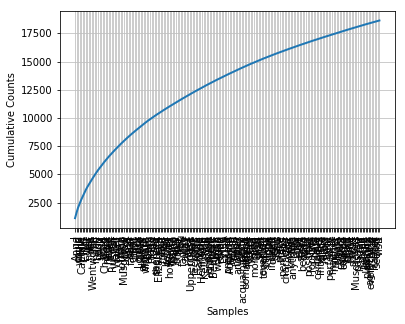

In [386]:
import matplotlib.pyplot as plt
freq_dist.plot(200, cumulative=True)

The simplest way to show most common unique words follow Zipf's law is to plot the data. Looking at most frequent and least frequent words only is misleading. For those types of words Zipf's law has the highest errors.
Instead of plotting rank vs. frequency, it is better to plot log(rank) on the x-axis and log(frequency) on the y axis. If Zipf's law holds we should see a line with slope -1. 

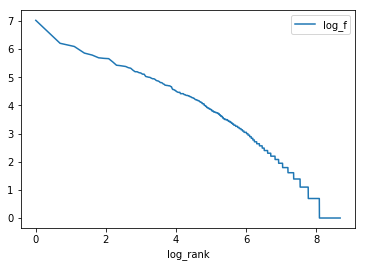

In [387]:
most_common['Zipf']= (most_common.index.values+1)*most_common['frequency']
most_common['log_f']=np.log(most_common['frequency'])
most_common['log_rank']=np.log(most_common.index.values+1)

most_common[:200]
most_common.plot(x='log_rank',y='log_f')
plt.show()

The graph above shows that line slope is close to -1. It means that most common unique words follow Zipf's law.

Words frequencies differ corpus to corpus. The word can be found within most common words in this coprpus but it can be found within less common words in the different corpus. 